In [7]:
import pandas as pd
import numpy as np

In [8]:
import sys
import os
sys.path.append("/Users/leahtan/Documents/3_Research/2024-Ali/ISR/src")
from utils.config_utils import load_config
config = load_config()

In [3]:
meta_path = f"{config['data']['path']}/{config['data']['meta_file']}"
print(meta_path)
#read txt seg by tab

import pandas as pd


# Read the file line by line and process it
data = []

# Open and read the file manually
with open(meta_path, 'r', encoding='utf-8') as f:
    for line in f:
        # Split the line into first five fields and then treat the rest as the comment (review)
        parts = line.strip().split(' ', 5)  # Only split by space for the first 5 elements
        if len(parts) == 6:  # Ensure the line has all parts
            product_id = parts[0]
            user_id = parts[1]
            transaction_id = parts[2]
            date = parts[3]
            rating = parts[4]
            comment = parts[5]  # Everything after the first five fields is treated as the review
            data.append([product_id, user_id, transaction_id, date, rating, comment])

# Create DataFrame from the processed data
df = pd.DataFrame(data, columns=['Product_ID', 'User_ID', 'Transaction_ID', 'Date', 'Rating', 'Comment'])

# Print the DataFrame to check the result
print(df.head())

/Users/leahtan/Documents/3_Research/2024-Ali/ISR/data/raw/Amazon_metadata_original.txt
    Product_ID     User_ID Transaction_ID      Date Rating         Comment
0  ﻿B0010L7T4I  1000066988     1034151422  17-08-10      4        降价啦，下决心买
1   B0010LCLBO  1000066988     1006426892  30-05-08      5           酸奶机不错
2   B0010MABL0  1000066988     1033345292  26-07-10      4  买第二瓶了，挺好用的，润润的
3   B0010MAFJS  1000066988     1006426912  30-05-08      5         用的，感觉不错
4   B0012NMND6  1000066988     1033345262  26-07-10      4            链子不错


In [6]:
head = ['MNR','ANR','NDR',
        'BST','ENR','MeanVar',
        'TMF','PopRank','DisAvg','CatEnt']
feature  = pd.read_csv(features_path, sep='\t',names=head)
feature


,MNR,ANR,NDR,BST,ENR,MeanVar,TMF,PopRank,DisAvg,CatEnt
0,0.299709,0.060465,0.003831,0.001456,0.484808,0.637222,0.218555,0.068965,0.071024,0.822194
1,0.131321,0.046512,0.007663,0.001622,0.410832,0.780098,0.295172,0.072464,0.070725,0.845244
2,0.345248,0.046512,0.002554,0.000817,0.431968,0.806822,0.147868,0.079646,0.058153,0.859755
3,0.431295,0.069767,0.024266,0.004470,0.454425,0.629279,0.149804,0.064935,0.108069,0.741075
4,0.021710,0.013954,0.021711,0.006066,0.138705,0.000000,0.158333,0.090909,0.062393,0.852488
...,...,...,...,...,...,...,...,...,...,...
9419,0.000000,0.000000,0.001277,0.001277,0.000000,0.250480,0.348991,0.227273,0.012515,0.879140
9420,0.001059,0.009302,0.021711,0.008084,0.109643,0.128543,0.216718,0.076923,0.138684,0.766589
9421,0.000000,0.000000,0.001277,0.001277,0.000000,0.250480,0.451153,0.227273,0.046209,0.876538
9422,0.000265,0.004651,0.047254,0.023627,0.022457,0.000000,0.198811,0.037037,0.059044,0.893590


# 

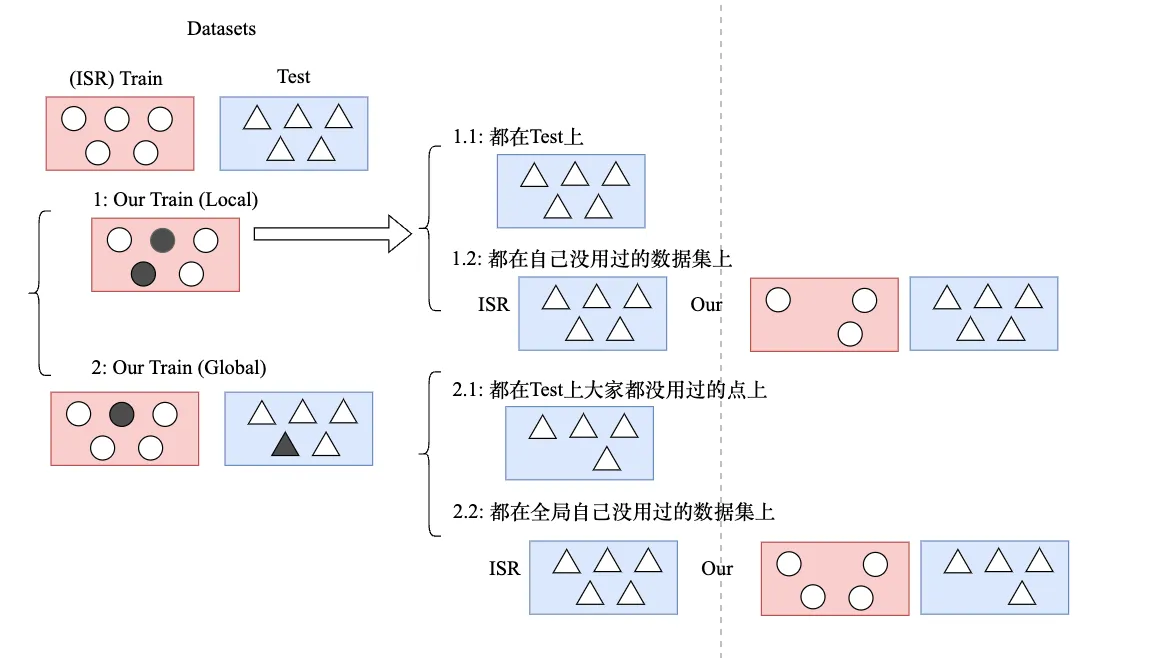

We are going to conduct model comparison following 2.1.

In [5]:
#our model use at most 5% of the nodes, obtained through active learning by searching globally. 
#The compared ISR model use 5% of nodes as train set.
import pandas as pd
path_result_our_all = '/Users/leahtan/Documents/3_Research/2024-Ali/ISR/data/raw/results/our/5percent_all_sample_global.txt' 
path_result_isr = '/Users/leahtan/Documents/3_Research/2024-Ali/ISR/data/raw/results/isr/prediction_5percents.txt'

In [6]:
result_isr = pd.read_csv(path_result_isr, sep=' ',names=['user_no','isr_pred'])#starts from 1
result_our30_all = pd.read_csv(path_result_our_all, sep=' ',names=['user_no','our30_all_pred'])#starts from 0
result_our30_all['user_no'] += 1
result_isr.drop_duplicates(subset=['user_no'], keep='first', inplace=True)
print(result_isr)
result_our30_all.drop_duplicates(subset=['user_no'], keep='first', inplace=True)
print(result_our30_all)

      user_no  isr_pred
0           1         0
1           2         0
2           3         0
3           4         0
4           5         0
...       ...       ...
7950     9420         0
7951     9421         0
7952     9422         0
7953     9423         0
7954     9424         0

[7955 rows x 2 columns]
      user_no  our30_all_pred
0           1               0
1           2               0
2           3               0
3           4               0
4           5               0
...       ...             ...
7954     9420               0
7955     9421               0
7956     9422               0
7957     9423               0
7958     9424               0

[7959 rows x 2 columns]


In [13]:
label_path = f"{config['data']['path']}/{config['data']['label_file']}"
features_path = f"{config['data']['path']}/{config['data']['feature_file']}"
print(label_path)
print(features_path)

label = pd.read_csv(label_path, sep=' ')

/Users/leahtan/Documents/3_Research/2024-Ali/ISR/data/raw/UserLabel.txt
/Users/leahtan/Documents/3_Research/2024-Ali/ISR/data/raw/UserFeature.txt


In [14]:
label = label.merge(result_isr, on='user_no', how='left')
label = label.merge(result_our30_all, on='user_no', how='left')
label.dropna(inplace=True)#label also starts from 1, since we drop na, we are implementing 2.1 method
label

,user_ID,user_no,label,isr_pred,our30_all_pred
0,1000066988,1,0,0.0,0.0
1,1000133148,2,0,0.0,0.0
2,1000188668,3,0,0.0,0.0
3,1000198178,4,0,0.0,0.0
4,1000340388,5,0,0.0,0.0
...,...,...,...,...,...
9419,1373500098,9420,0,0.0,0.0
9420,1374070218,9421,0,0.0,0.0
9421,1375549478,9422,0,0.0,0.0
9422,1380967178,9423,1,0.0,0.0


In [16]:
from sklearn.metrics import classification_report
print('ISR-5percent')
print(classification_report(label['label'], label['isr_pred']))
print('Our-5percent-Global')
print(classification_report(label['label'], label['our30_all_pred']))

ISR-5percent
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6815
           1       0.81      0.82      0.82       760

    accuracy                           0.96      7575
   macro avg       0.89      0.90      0.90      7575
weighted avg       0.96      0.96      0.96      7575

Our-5percent-Global
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6815
           1       0.89      0.96      0.93       760

    accuracy                           0.98      7575
   macro avg       0.95      0.98      0.96      7575
weighted avg       0.99      0.98      0.99      7575



In [19]:
#Cases where we are wrong but ISR is right
label[(label['label'] == 1) & (label['our30_all_pred'] == 0) & (label['isr_pred'] == 1)]

,user_ID,user_no,label,isr_pred,our30_all_pred
4387,1109202788,4388,1,1.0,0.0
5354,1140244208,5355,1,1.0,0.0
5843,1158184888,5844,1,1.0,0.0
9407,1349065118,9408,1,1.0,0.0


In [20]:
#Cases where we are right but ISR is wrong
label[(label['label'] == 1) & (label['our30_all_pred'] == 1) & (label['isr_pred'] == 0)]

,user_ID,user_no,label,isr_pred,our30_all_pred
150,1003414328,151,1,0.0,1.0
238,1005574968,239,1,0.0,1.0
264,1006347708,265,1,0.0,1.0
871,1018437688,872,1,0.0,1.0
1072,1022821368,1073,1,0.0,1.0
...,...,...,...,...,...
9122,1284322498,9123,1,0.0,1.0
9133,1284650058,9134,1,0.0,1.0
9134,1284662478,9135,1,0.0,1.0
9303,1307117718,9304,1,0.0,1.0


We now save the above cases and plot them into the graph later

In [22]:
ourcorrect = label[(label['label'] == 1) & (label['our30_all_pred'] == 1) & (label['isr_pred'] == 0)].user_ID
isrcorrect = label[(label['label'] == 1) & (label['our30_all_pred'] == 0) & (label['isr_pred'] == 1)].user_ID
bothcorrect = label[(label['label'] == 1) & (label['our30_all_pred'] == 1) & (label['isr_pred'] == 1)].user_ID
ourcorrect = ourcorrect.to_list()
isrcorrect = isrcorrect.to_list()
bothcorrect = bothcorrect.to_list()
path = '/Users/leahtan/Documents/3_Research/2024-Ali/ISR/data/raw/results/comparison'
with open(f'{path}/ourcorrect.txt', 'w') as f:
    for item in ourcorrect:
        f.write("%s\n" % item)
with open(f'{path}/isrcorrect.txt', 'w') as f:
    for item in isrcorrect:
        f.write("%s\n" % item)
with open(f'{path}/bothcorrect.txt', 'w') as f:
    for item in bothcorrect:
        f.write("%s\n" % item)